### Imports

In [96]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Flatten, MaxPooling2D

### Load Dataset

In [12]:
data_path = 'C:\\Users\\Lenovo\\Documents\\Github\\Datasets\\human-detection-dataset'

In [62]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_path,
    validation_split=0.2,
    subset='training',
    seed=123
)

Found 921 files belonging to 2 classes.
Using 737 files for training.


In [63]:
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=data_path,
    validation_split=0.2,
    subset='validation',
    seed=123
)

Found 921 files belonging to 2 classes.
Using 184 files for validation.


### Visualization

In [80]:
itter = train_data.as_numpy_iterator()

In [89]:
batch = next(itter)

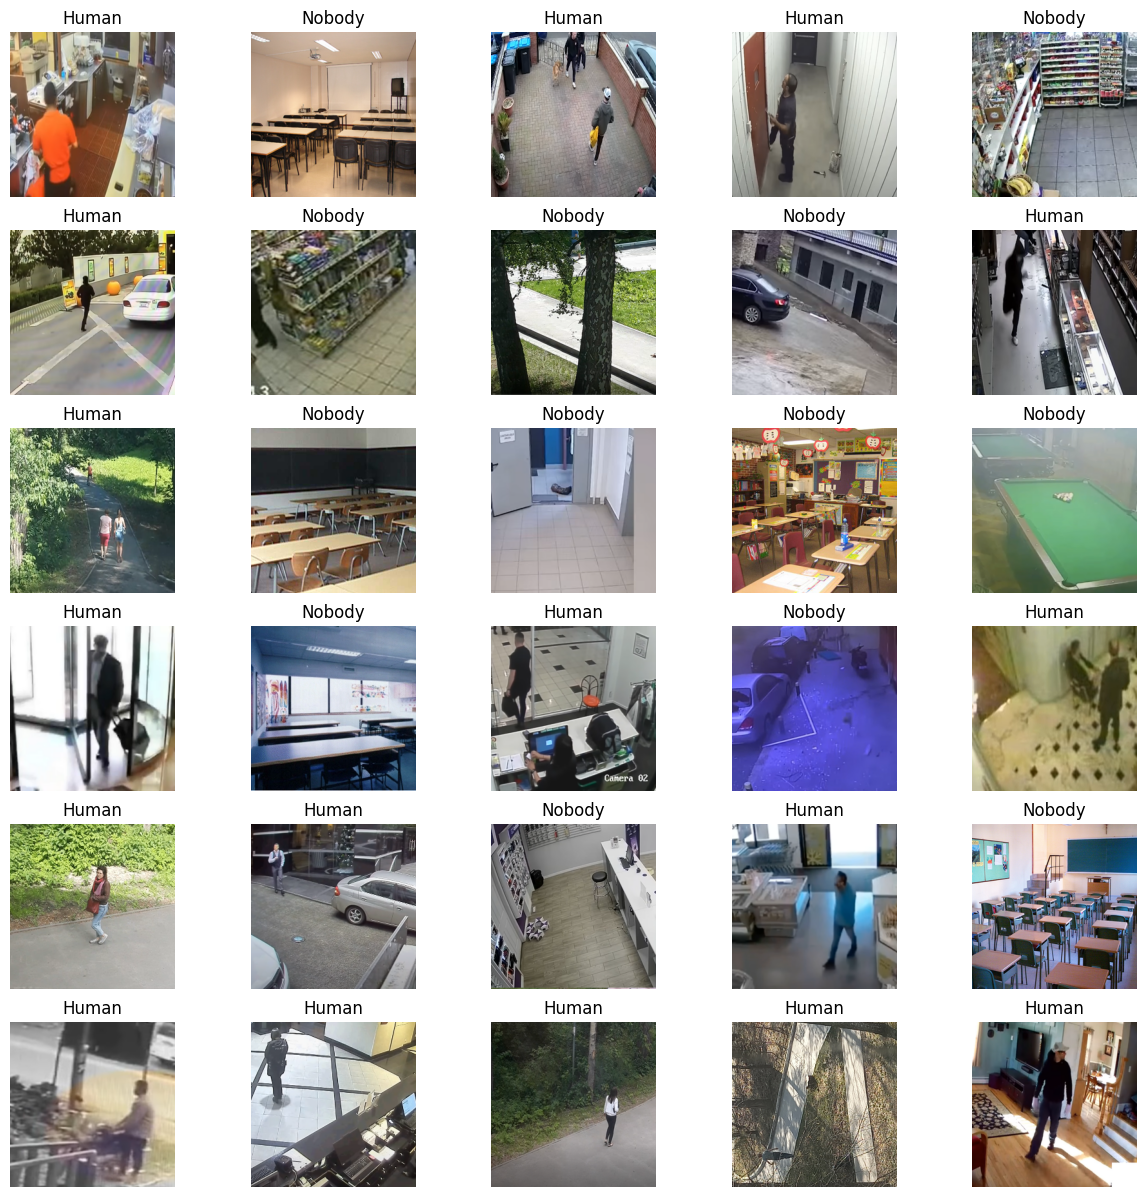

In [90]:
images = batch[0].astype('uint8')
labels = batch[1]

label_list = ['Nobody', 'Human']

plt.figure(figsize=(15, 15))
for i in range(30):
    ax = plt.subplot(6, 5, i+1)
    img = images[i]
    label = label_list[labels[i]]
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

### Model

In [91]:
model = tf.keras.models.Sequential()

In [99]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [102]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.